Bland-Altman Statistical test

In [1]:
from mlxtend.evaluate import mcnemar
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import os
import sys
import csv
import plotly.graph_objects as px
import statsmodels.api as sm

In [36]:
# Datasets
datasets = ['aids', 'students', 'malware']

# Machine Learning models
models = ['LogisticRegression', 'SVC', 'RandomForestClassifier', 'GradientBoostingClassifier','ResidualNeuralNetwork', 'MultiLayerNeuralNetwork']

# Experiment options
subsampling_options = ['False', 'True']
feature_reduction_options = ['False', 'True']

# Inputs
metrics = ['enery_prep','energy_train','energy_pred']
'''
metrics = ['accuracy','f1_score','log_loss','auc','preprocess_time','training_time','prediction_time','enery_prep','energy_train','energy_pred']
results = {}
for model in models:
    results[model] = {}
    for metric in metrics:
        totalmetrics   = []
        for ss_opt in subsampling_options:
            for fr_opt in feature_reduction_options:
                for dataset in datasets:
                    filename = f'{dataset}_{ss_opt}_{fr_opt}_{model}'
                    path = f'results_new_linux_results/{filename}.csv'
                    df = pd.read_csv(path)
                    totalmetrics.append(df[metric].mean())
        results[model][metric] = np.mean(totalmetrics)
'''
results = {}
for model in models:
    results[model] = []
    totalmetrics   = []
    for metric in metrics:
        for ss_opt in subsampling_options:
            for fr_opt in feature_reduction_options:
                for dataset in datasets:
                    filename = f'{dataset}_{ss_opt}_{fr_opt}_{model}'
                    path = f'results_new_linux_results/{filename}.csv'
                    df = pd.read_csv(path)
                    results[model].append(df[metric].mean())


print(results['LogisticRegression'])

[2.9501284777321456e-08, 3.831166979977223e-08, 9.504446795974312e-08, 7.422861808749643e-08, 1.2072256566121456e-07, 6.368640013758459e-07, 8.3798951737276e-08, 1.4268032676295156e-07, 1.4492644082111926e-07, 9.594714160498161e-08, 1.8321218025184246e-07, 4.686989849417251e-07, 9.09487263753004e-08, 1.5645370957533626e-07, 3.4189973306477753e-07, 5.457658425932296e-08, 5.805244126617765e-08, 1.627018231051722e-07, 4.972944683367567e-08, 1.616416250458441e-07, 1.6320668661077035e-07, 3.850920284225756e-08, 3.882962452008527e-08, 1.0184471026721624e-07, 2.5173988479206015e-08, 3.223812874147557e-08, 2.744937838567269e-08, 2.7753215407296497e-08, 3.122559861718602e-08, 2.605789201146809e-08, 4.272432378599713e-08, 4.4144405354837184e-08, 2.9133686579060728e-08, 2.1017548446255422e-08, 2.6708324428022577e-08, 3.0198905906053916e-08]


In [3]:
def make_plots(model1,model2):
    results1 = results[model1]
    results2 = results[model2]
    x = []
    y = []
    for metric in metrics:
        x.append((results1[metric]+results2[metric])/2)
        y.append(results1[metric]-results2[metric])
    fig = px.Figure()
    fig.add_trace(px.Scatter(mode='markers',x=x, y=y, marker=dict(size=12)))
    fig.show()

In [34]:
def make_plots(model1,model2):
    results1 = results[model1]
    results2 = results[model2]
    df = pd.DataFrame({model1:results1,model2:results2})
    #create Bland-Altman plot                  
    f, ax = plt.subplots(1, figsize = (8,5))
    sm.graphics.mean_diff_plot(df[model1], df[model2], ax = ax)
    print('B-A test {} - {}: {}'.format(model1,model2,np.mean(results1)-np.mean(results2)))

    #display Bland-Altman plot
    plt.show()


B-A test LogisticRegression - SVC: -2.2171470622225773e-07


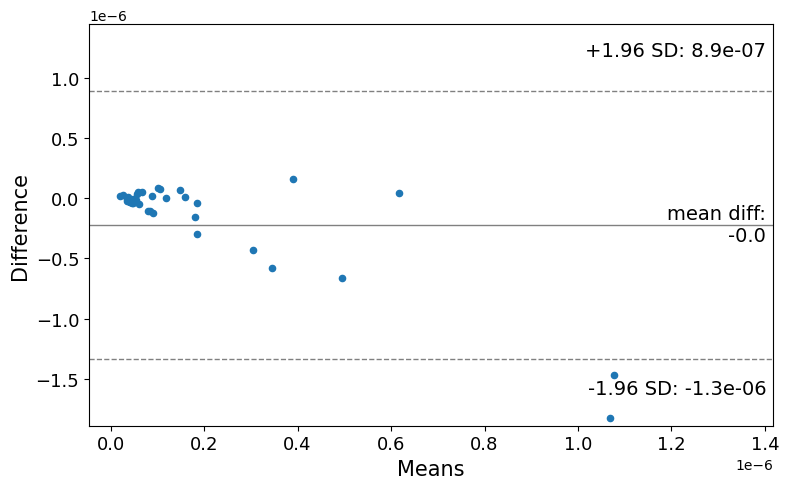

B-A test LogisticRegression - RandomForestClassifier: -1.5577819466526854e-07


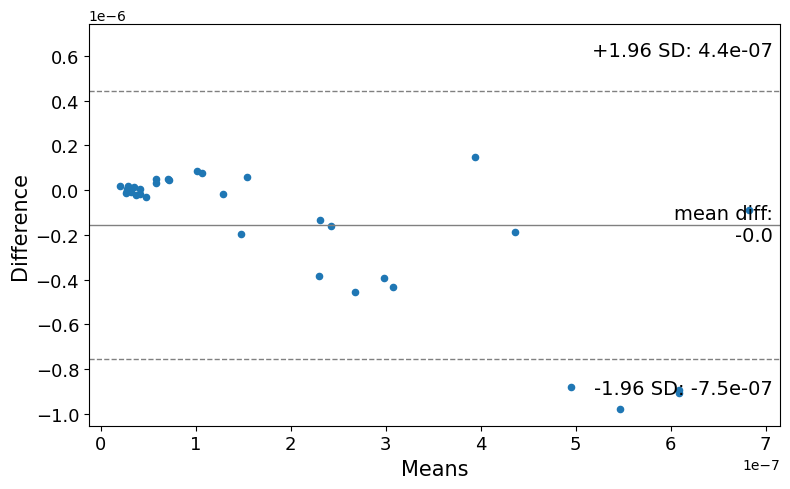

B-A test LogisticRegression - GradientBoostingClassifier: -2.5271426149096284e-07


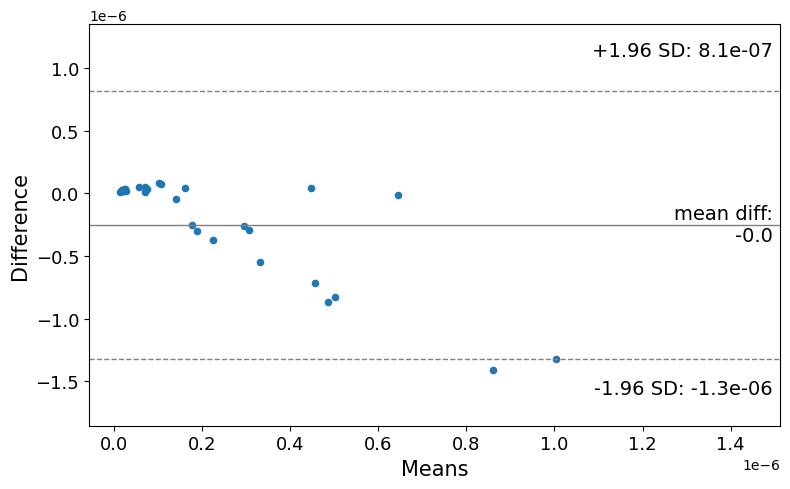

B-A test LogisticRegression - ResidualNeuralNetwork: -4.572762896214525e-07


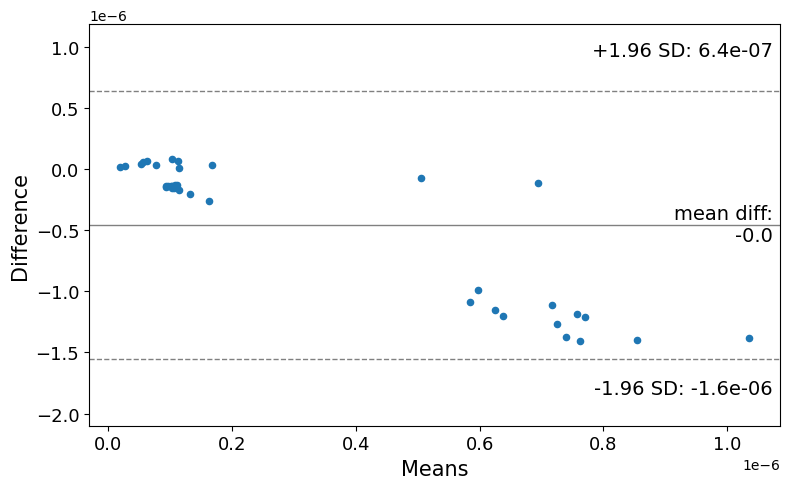

B-A test LogisticRegression - MultiLayerNeuralNetwork: -6.689231436557956e-07


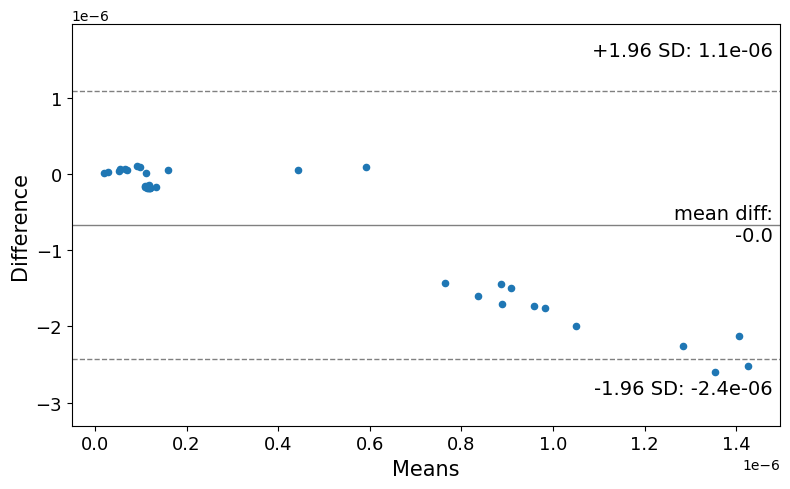

B-A test SVC - LogisticRegression: 2.2171470622225773e-07


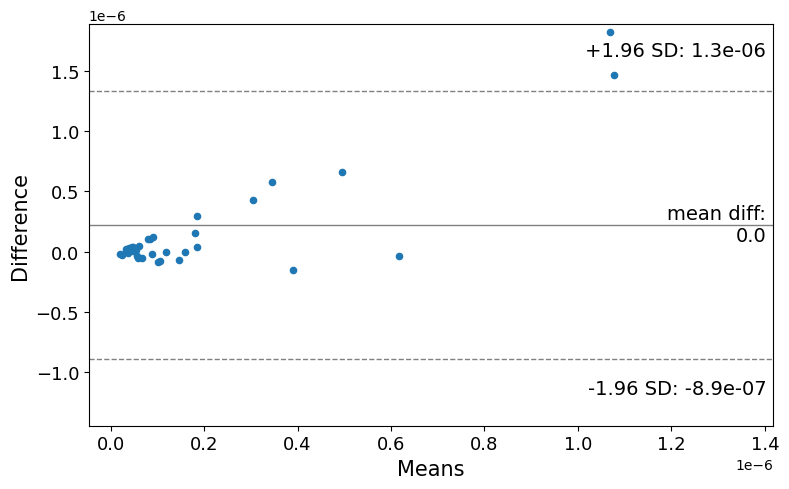

B-A test SVC - RandomForestClassifier: 6.593651155698919e-08


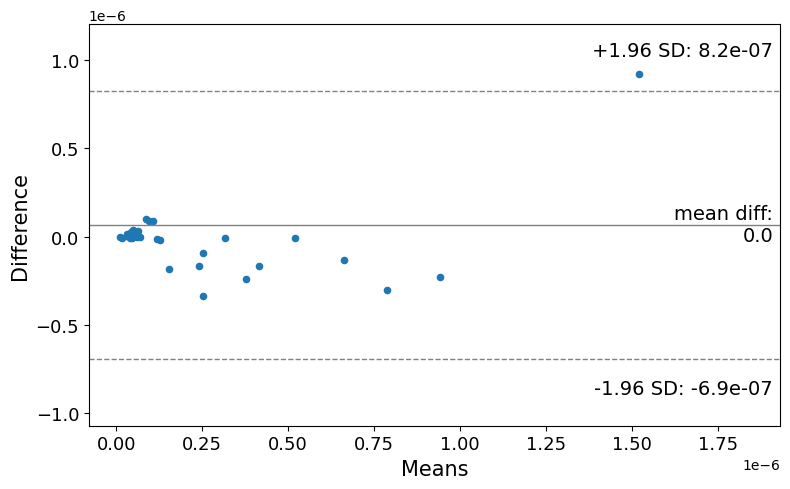

B-A test SVC - GradientBoostingClassifier: -3.099955526870508e-08


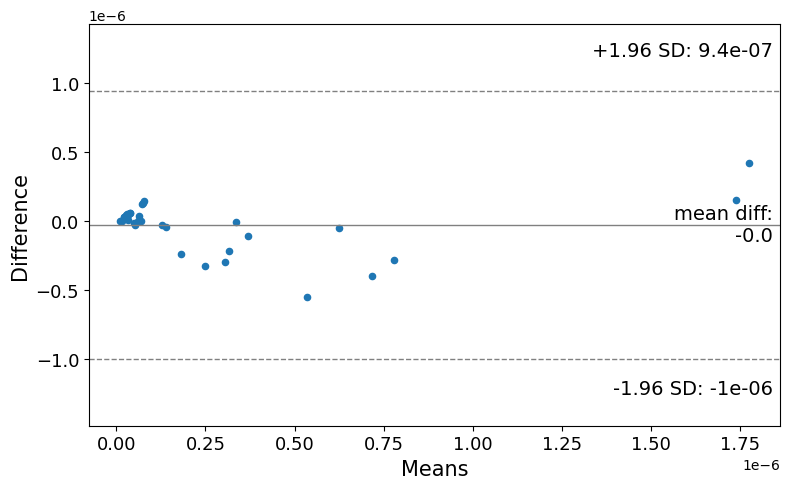

B-A test SVC - ResidualNeuralNetwork: -2.3556158339919482e-07


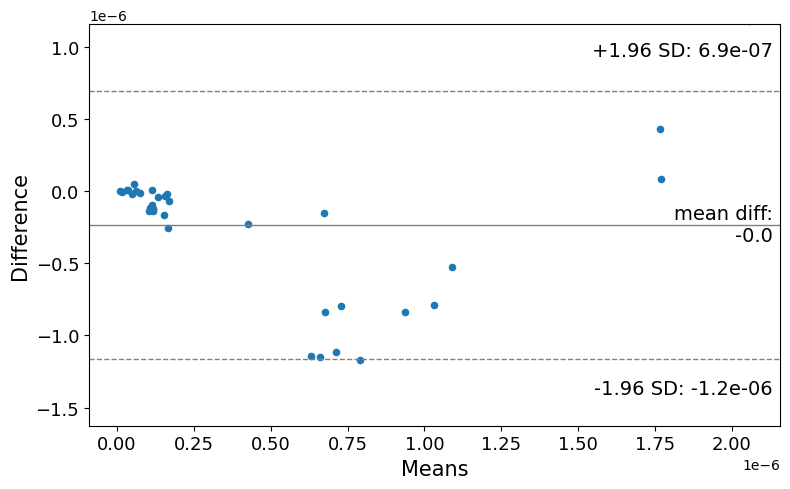

B-A test SVC - MultiLayerNeuralNetwork: -4.472084374335379e-07


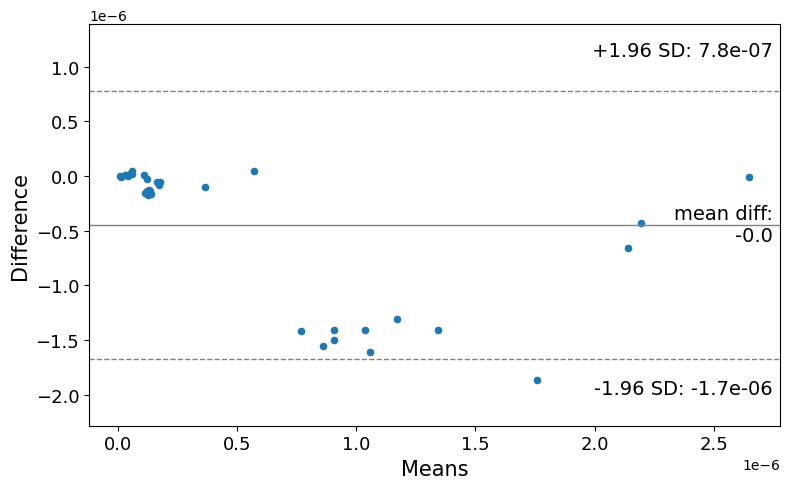

B-A test RandomForestClassifier - LogisticRegression: 1.5577819466526854e-07


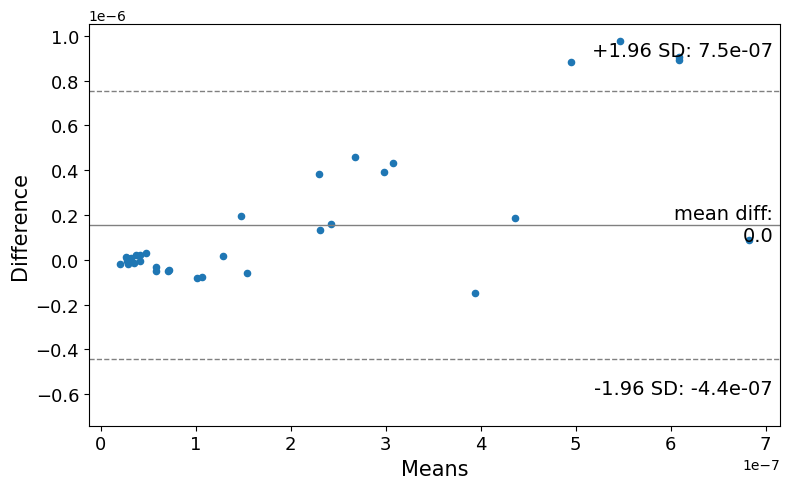

B-A test RandomForestClassifier - SVC: -6.593651155698919e-08


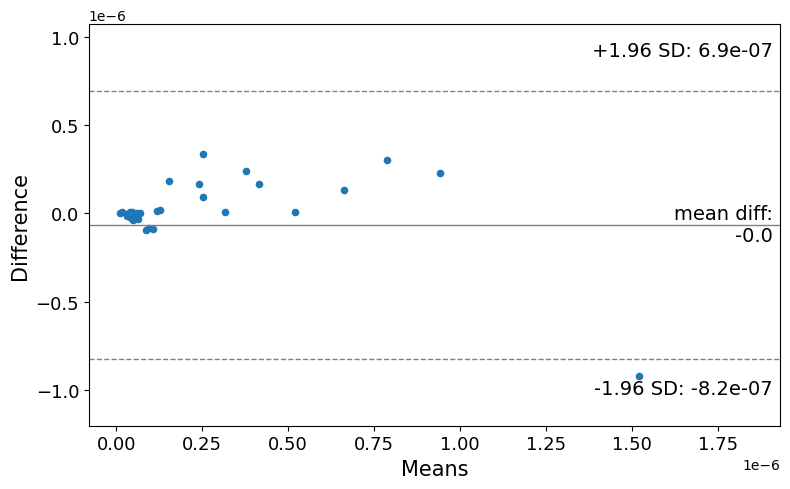

B-A test RandomForestClassifier - GradientBoostingClassifier: -9.693606682569427e-08


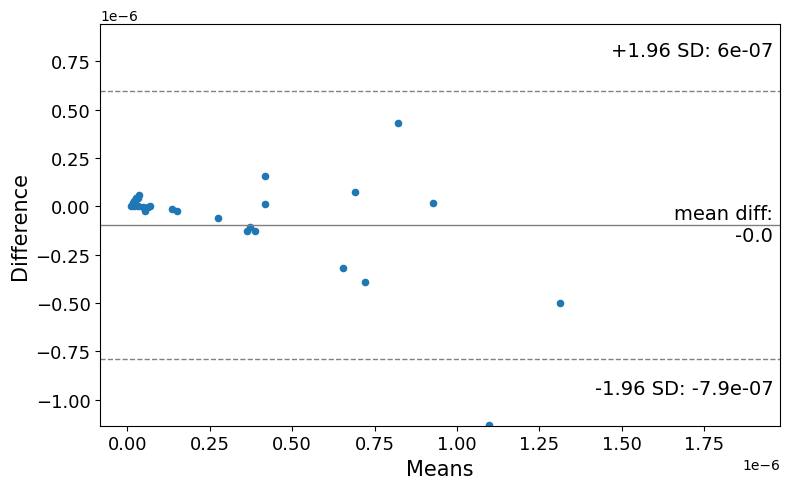

B-A test RandomForestClassifier - ResidualNeuralNetwork: -3.01498094956184e-07


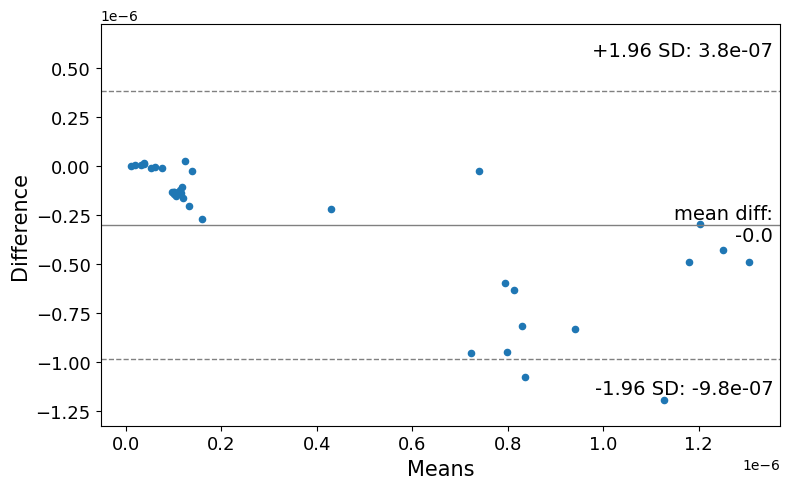

B-A test RandomForestClassifier - MultiLayerNeuralNetwork: -5.131449489905271e-07


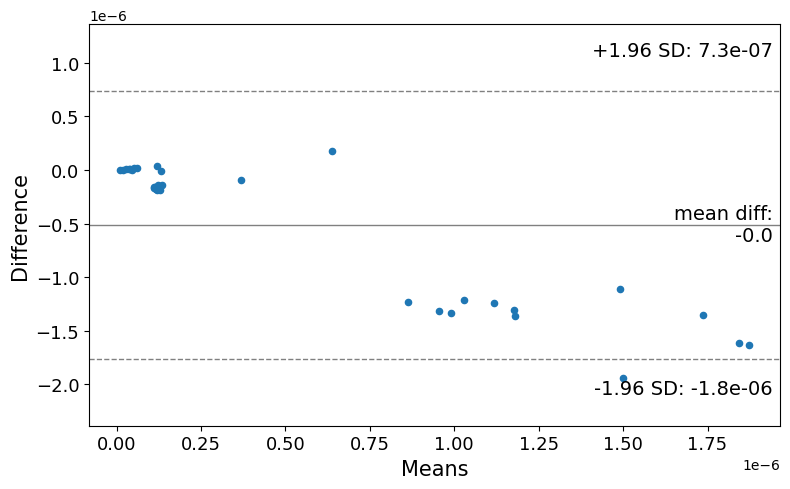

B-A test GradientBoostingClassifier - LogisticRegression: 2.5271426149096284e-07


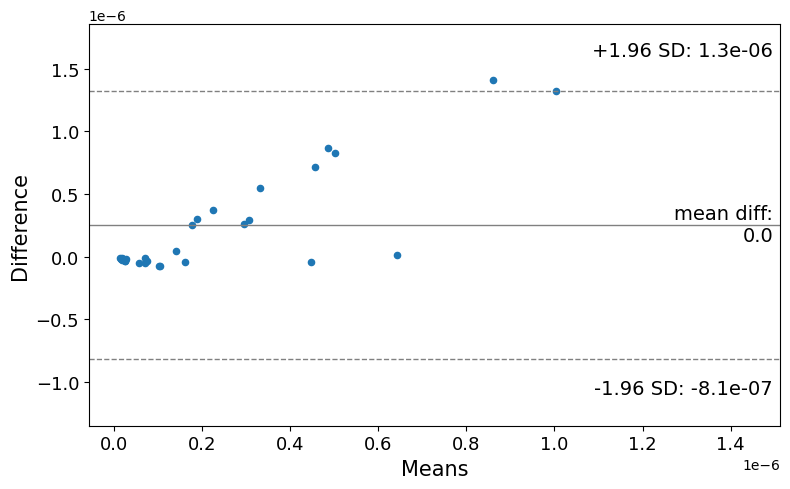

B-A test GradientBoostingClassifier - SVC: 3.099955526870508e-08


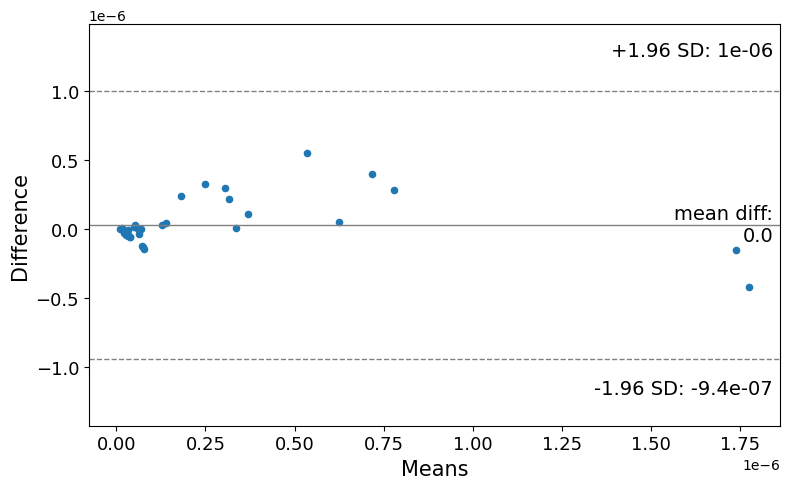

B-A test GradientBoostingClassifier - RandomForestClassifier: 9.693606682569427e-08


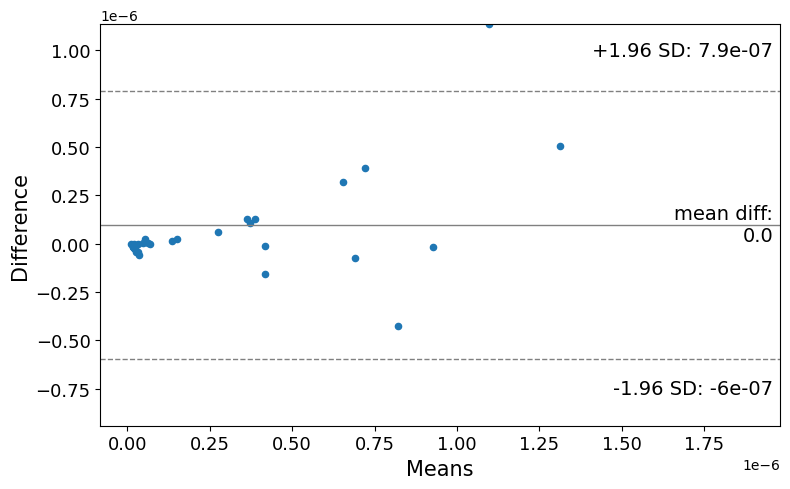

B-A test GradientBoostingClassifier - ResidualNeuralNetwork: -2.0456202813048974e-07


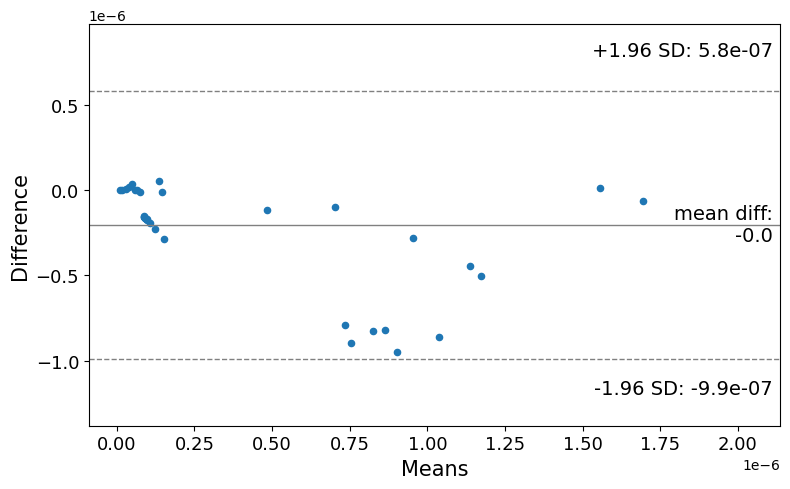

B-A test GradientBoostingClassifier - MultiLayerNeuralNetwork: -4.1620888216483284e-07


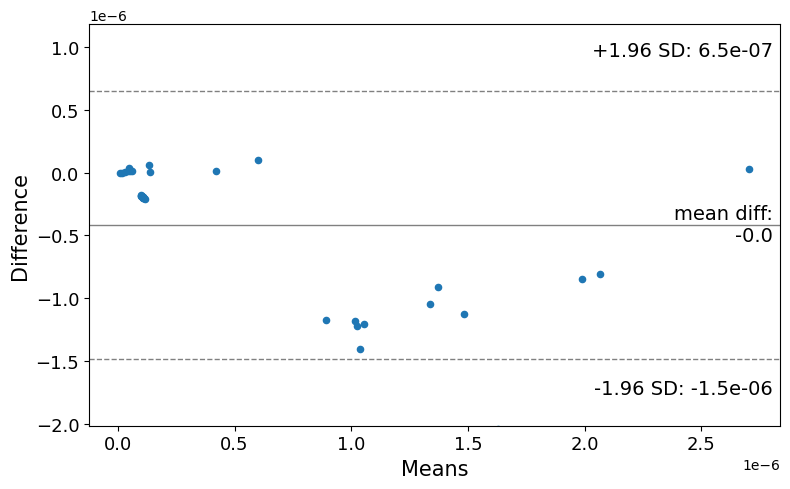

B-A test ResidualNeuralNetwork - LogisticRegression: 4.572762896214525e-07


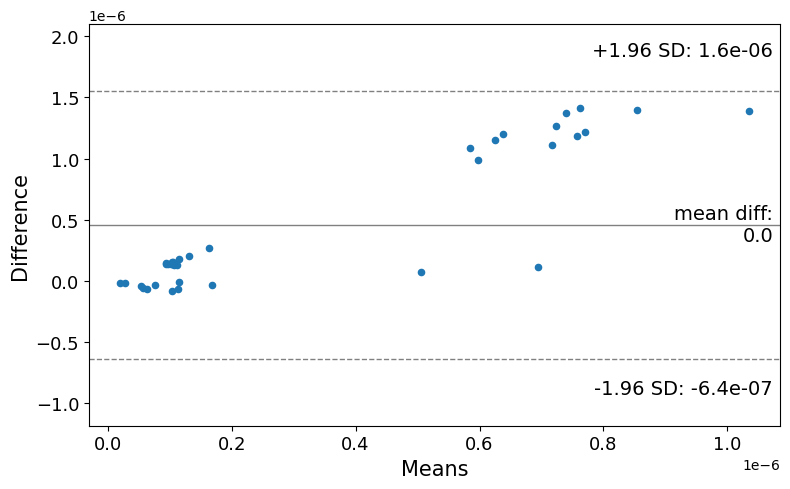

B-A test ResidualNeuralNetwork - SVC: 2.3556158339919482e-07


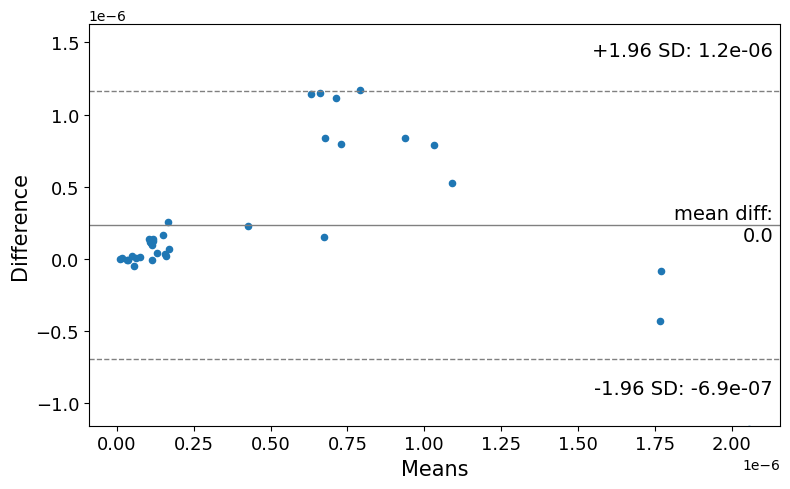

B-A test ResidualNeuralNetwork - RandomForestClassifier: 3.01498094956184e-07


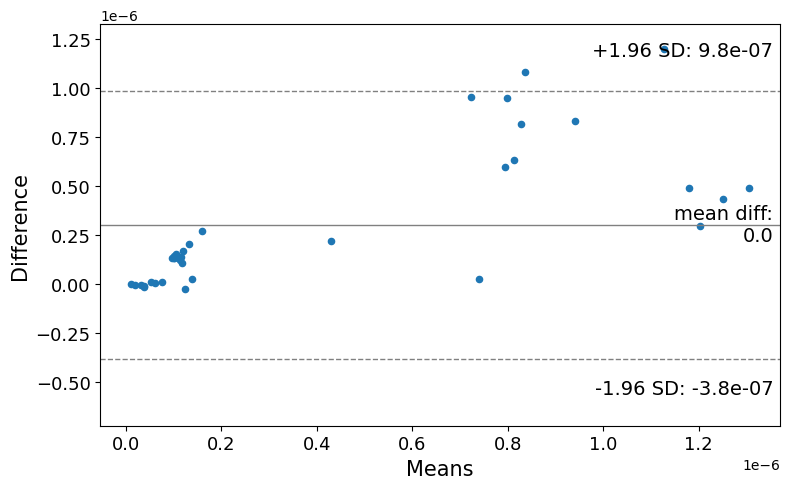

B-A test ResidualNeuralNetwork - GradientBoostingClassifier: 2.0456202813048974e-07


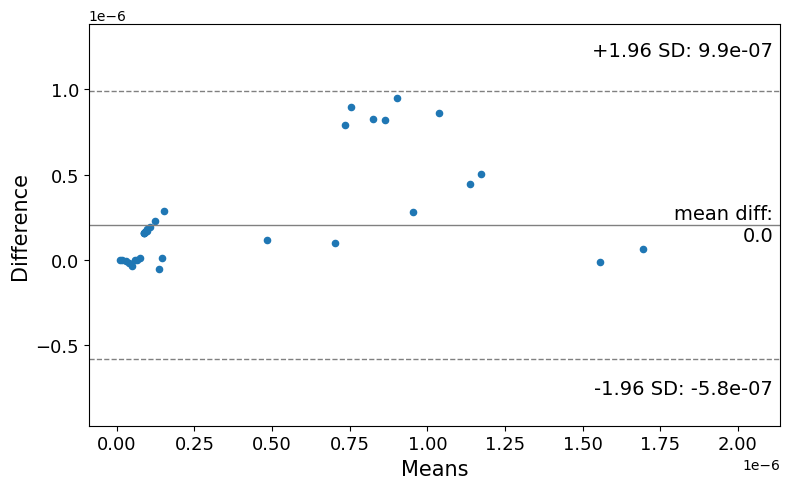

B-A test ResidualNeuralNetwork - MultiLayerNeuralNetwork: -2.116468540343431e-07


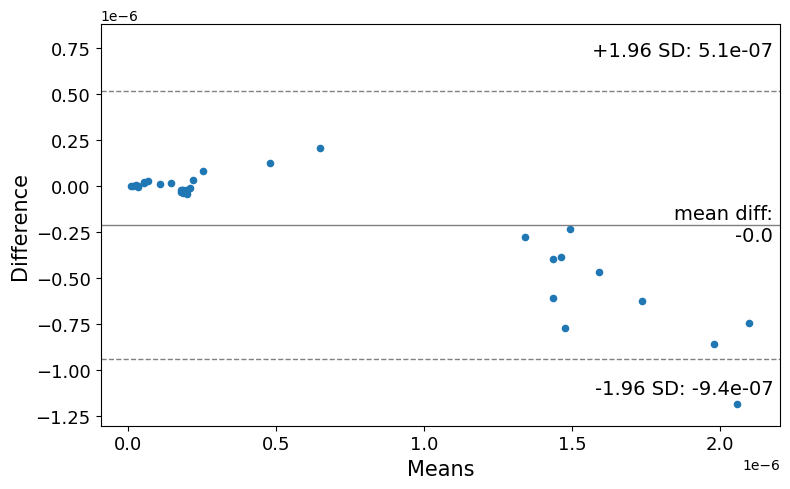

B-A test MultiLayerNeuralNetwork - LogisticRegression: 6.689231436557956e-07


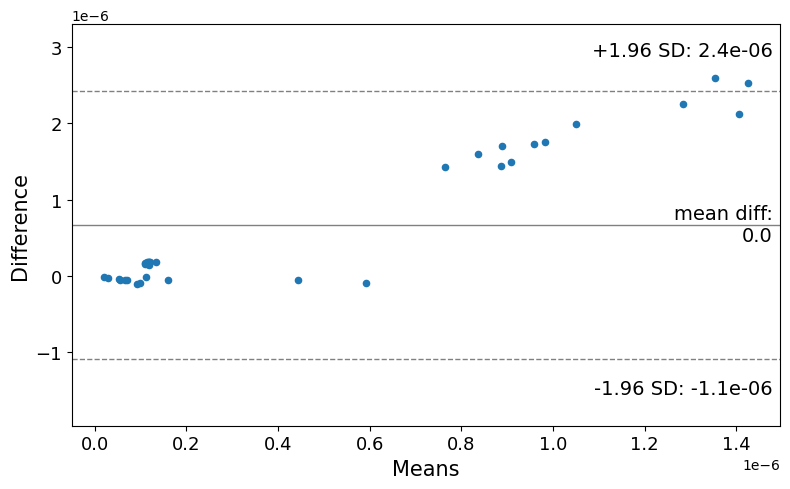

B-A test MultiLayerNeuralNetwork - SVC: 4.472084374335379e-07


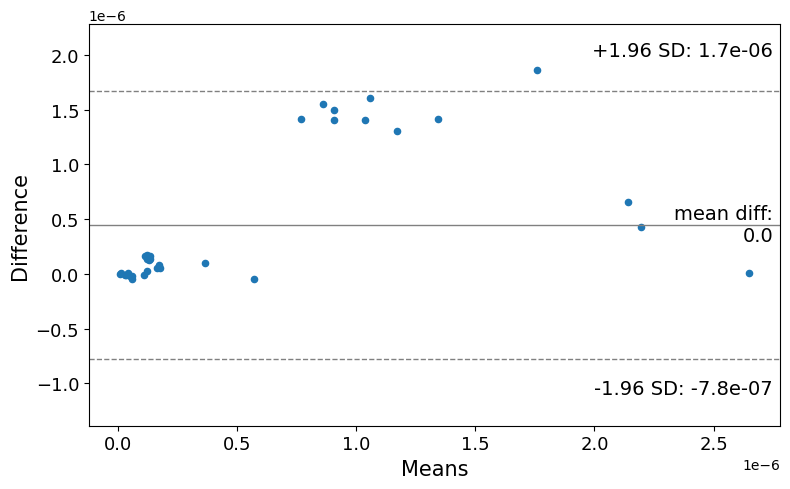

B-A test MultiLayerNeuralNetwork - RandomForestClassifier: 5.131449489905271e-07


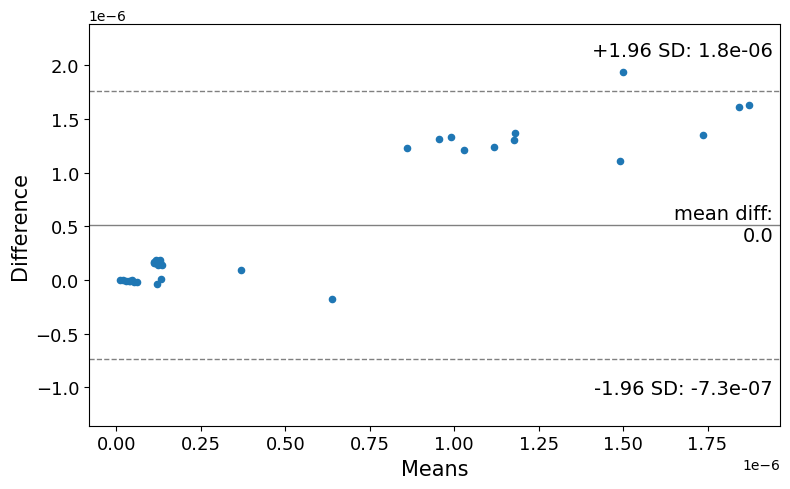

B-A test MultiLayerNeuralNetwork - GradientBoostingClassifier: 4.1620888216483284e-07


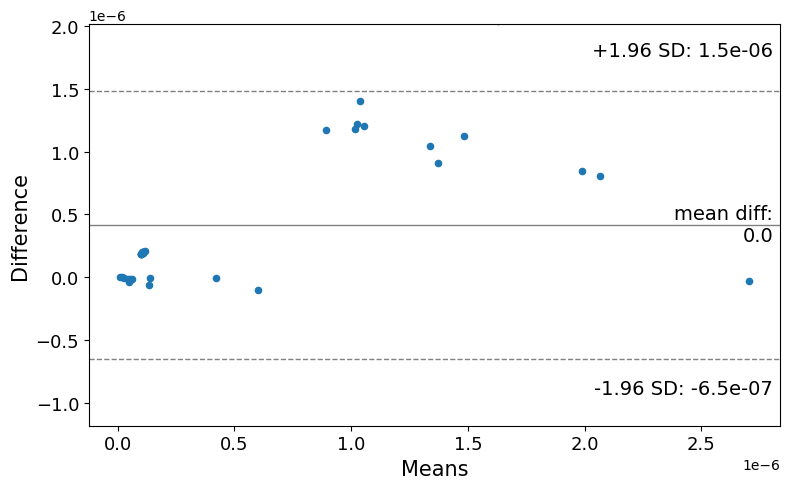

B-A test MultiLayerNeuralNetwork - ResidualNeuralNetwork: 2.116468540343431e-07


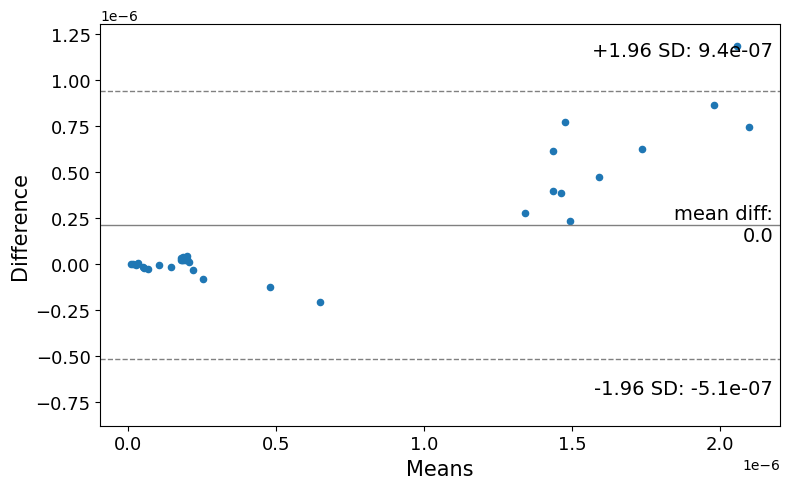

In [35]:
for model1 in models:
    for model2 in models:
        if model1 != model2:
            make_plots(model1,model2)

B-A test LogisticRegression - RandomForestClassifier: -0.0715762573484563


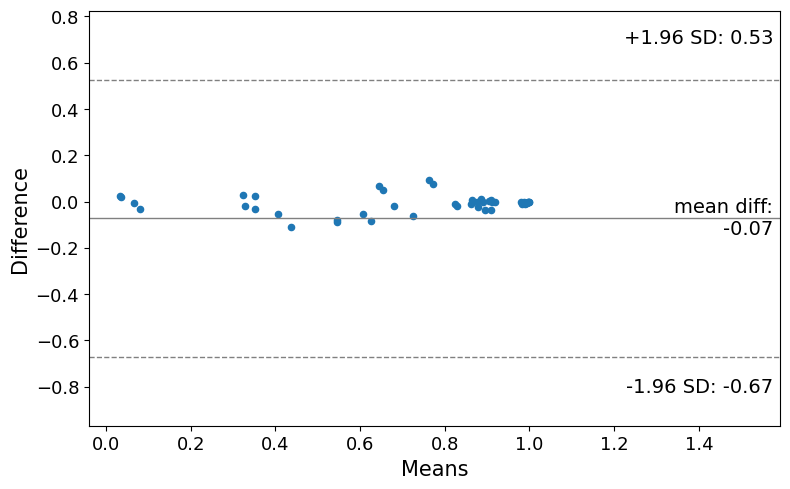

In [31]:
make_plots('LogisticRegression','RandomForestClassifier')
